# Principal Component Analysis

Principal Component Analysis or PCA is a dimensionality reduction technique that aims at reducing the number of extraneous variables to a smaller set of most important variables.

Problems with high dimensional data:
- high computational cost while fitting a model
- harder to visualise and analyse the dataset
- may lead to overfitting and poor performance on unseen data

## When to use PCA

- When processing data with multi-colinearity among the features/variables.
- To find patterns in high-dimensional dataset
- When it is difficult to identify variables to be completely removed from the training
- To identify the directions in which the data is dispersed

## Visualise a dataset using PCA Plot

In [1]:
import matplotlib
from sklearn.datasets import load_iris as load_data
from sklearn.model_selection import train_test_split

In [2]:
matplotlib.rcParams["figure.figsize"] = (7, 7)
matplotlib.rcParams["font.size"] = 18

In [3]:
X, y = load_data(return_X_y=True)

[<Axes: title={'center': 'Principal Component Plot'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>,
 <Axes: title={'center': 'Principal Component Plot'}, xlabel='Principal Component 1', ylabel='Principal Component 3'>,
 <Axes: title={'center': 'Principal Component Plot'}, xlabel='Principal Component 2', ylabel='Principal Component 3'>]

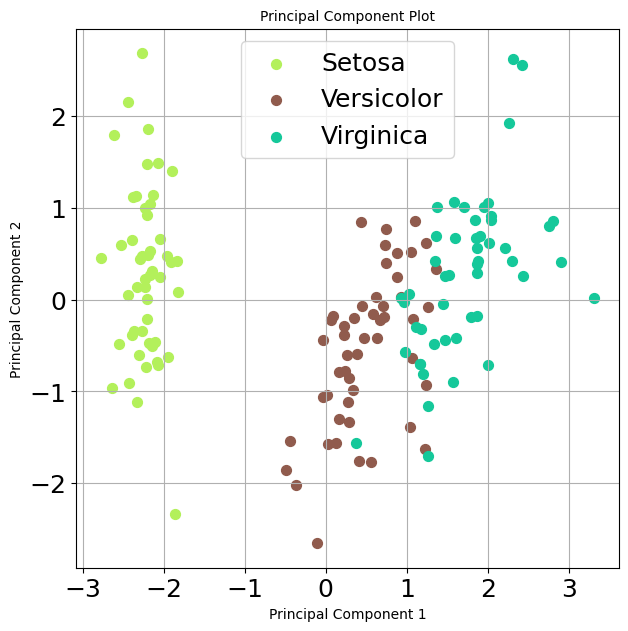

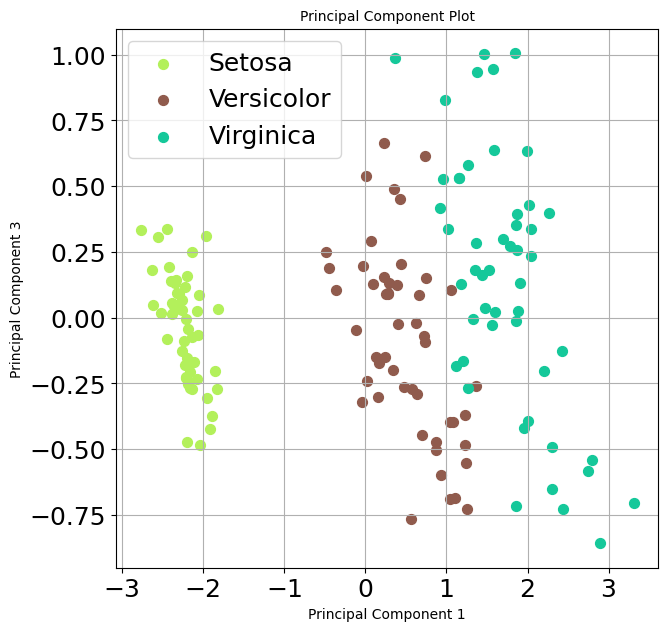

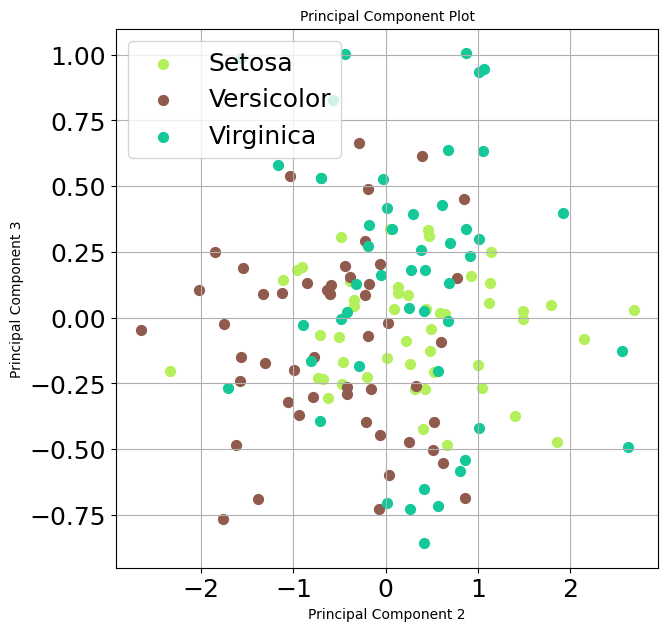

In [4]:
from sklearn_evaluation import plot

plot.pca(X, y, target_names=["Setosa", "Versicolor", "Virginica"], n_components=3)

## Interpreting PCA plots

- PCA plots can help to reveal clusters. Data points that have similar features are clustered together.
- First principal component captures the most variation in the data, while the second principal component reveals the second most variance.

## Model fitting with PCA

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(10000, n_features=5, n_informative=3, class_sep=0.5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("Accuracy before PCA:", knn.score(X_test, y_test))

Accuracy before PCA: 0.9363333333333334


Now let's apply PCA on the data and retrain a model. We can see that the results with PCA are as good as without PCA. Accuracy is similar with lesser dimensions.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=1
)

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_new, y_train)
print("Accuracy after PCA:", knn.score(X_test_new, y_test))

Accuracy after PCA: 0.9363333333333334
